In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/home/faraz/All Programs/Jupyter Notebook/2. Machine Learning/Data/income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


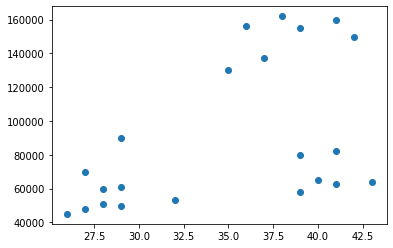

In [4]:
plt.scatter(df['Age'] , df['Income($)'])

**As we can see 3 clusters forming in our dataset**

In [5]:
df.drop("Name",axis="columns" , inplace=True)    # As name doesnt contribute in our model

In [6]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


# Training model

In [7]:
km = KMeans(n_clusters = 3)   # As we can see 3 clusters above

In [8]:
pred_y = km.fit_predict(df)
pred_y

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

**As we pass 3 clusters so we get 3 clusters**<br>
*Cluster - 0 , 1 , 2*

In [9]:
df["cluster"] = pred_y       # Appending cluster column in df

In [10]:
df.head(10)     #  here we can see all the clusters

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


In [11]:
km.cluster_centers_            # Centroid of cluster centers predicted by our model

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

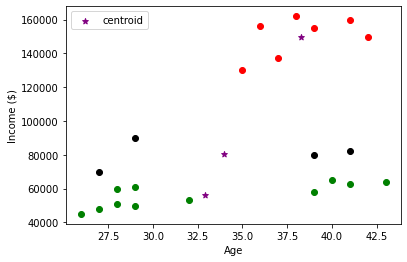

In [12]:
# Seperating all clusters into three dataframe
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plotting all in Scatter Plot
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**As we can see here our model is not accurate as our SCALLING is not right just look at values of X and Y Axis**
## Min Max Scaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])   # It converts the income in range of 0~1
df['Income($)'] = scaler.transform(df[['Income($)']])  # Updating df

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [14]:
df.head(10 )

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


### Now creating our model again after Scaling 

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
df['cluster']=y_predicted
df.head(10 )

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [17]:
km.cluster_centers_            # Centroid of cluster centers predicted by our model

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

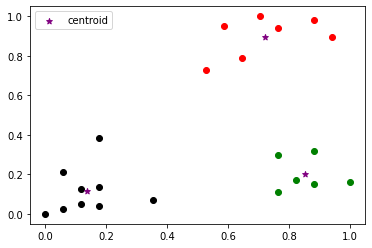

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# Here x = 0th column of cluster center and y = 1st column of cluster center

plt.legend()


**Here we can see all three clusters**

# Elbow Plot Method for finding number of clusters <br>
**Here we go from number of cases in range below we use range(1,10) and find SUM SQUARE ERROR**<br>
**km.inertia_ --> Gives SSE**

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [20]:
sse    # These are SUM SQUARE ERRORS

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2766936276300279,
 0.22037641690770673,
 0.16869711728567788,
 0.13943875937229083,
 0.10188787724979426]

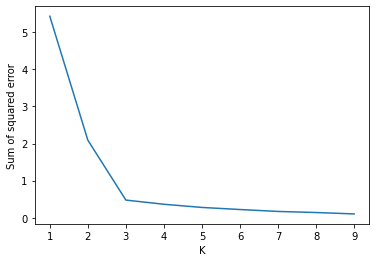

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**As we can see here our elbow is at 3 so we have 3 clusters in our model**